In [101]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
plt.rcParams.update({'font.size': 18})

def eventfile_to_dict(file):
    output = {}
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag in output:
                output[v.tag].append(v.simple_value)
            else:
                output[v.tag] = [v.simple_value]
    return output

# def plot_mean_std(x,ys,yerrors,labels):
#     for i,label in enumerate(labels):
#         plt.plot(x,ys[i])
#         plt.fill_between(x,ys[i]-yerrors[i],ys[i]+yerrors[i],alpha=0.3,label=label)
    # plt.legend()
    
def plot_mean_std(xs,ys,yerrors,labels):
    for i,label in enumerate(labels):
        if len(xs)>0:
            x = xs[i]
        else:
            x = range(len(ys[i]))
        if len(x)>len(ys[i]):
            x = x[:-(len(x)-len(ys[i]))]
        plt.plot(x,ys[i])
        plt.fill_between(x,ys[i]-yerrors[i],ys[i]+yerrors[i],alpha=0.3,label=label)
        
def single_figure(logdir, label_inds, title='', ynames=['Eval_AverageReturn'], xname=None, plot_avg=False, save=None):
    i,j = label_inds
    xs = []
    ys = []
    yerrs = []
    labels = []
    for file in glob.glob(logdir):
        result = eventfile_to_dict(file)
#         print(file)
        print(result.keys())
        for yname in ynames:
            labels.append(yname+'_'+'_'.join(file.split('_')[i:j]))
            ys.append(np.array(result[yname]))
            if xname:
                xs.append(np.array(result[xname]))
            if yname == 'Eval_AverageReturn':
                yerrs.append(np.array(result['Eval_StdReturn']))
            else:
                yerrs.append(np.zeros(1))        
#         try:
#             eval_means.append(np.array(result[f'{case}_AverageReturn']))
#             eval_stds.append(np.array(result[f'{case}_StdReturn']))
#         except:
#             eval_means.append(np.zeros(1))
#             eval_stds.append(np.zeros(1))
#     plt.figure(figsize=(12,5))
    if plot_avg:
        xs = [xs[0]]
        yerrs = [np.std(ys,axis=0)]
        ys = [np.mean(ys,axis=0)]
        labels = [labels[0]]
    plot_mean_std(xs,ys,yerrs,labels)
    if xname:
        plt.xlabel(xname)
    else:
        plt.xlabel('Number of iterations')
    plt.ylabel('Return')
    plt.legend(bbox_to_anchor=(1.03, 1.03))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.title(title)
    plt.tight_layout()
    if save:
        plt.grid()
        plt.savefig(f'../../report/{save}.png',dpi=100)   

# Q1

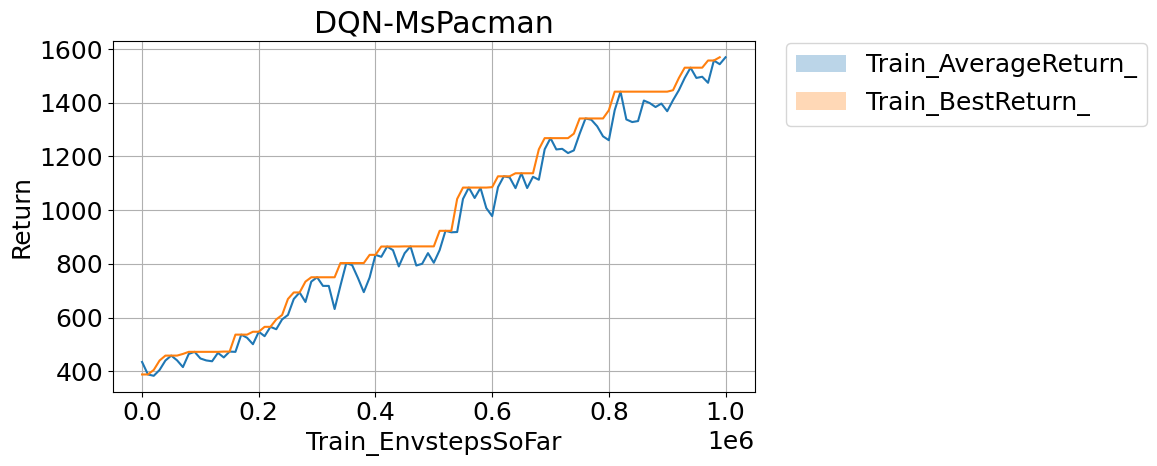

In [98]:
plt.figure(figsize=(12,5))
single_figure(f'../../data/q1_Ms*/events*', (1,1), 'DQN-MsPacman', 
              ynames=['Train_AverageReturn', 'Train_BestReturn'], xname='Train_EnvstepsSoFar',
              save='q1')

# Q2

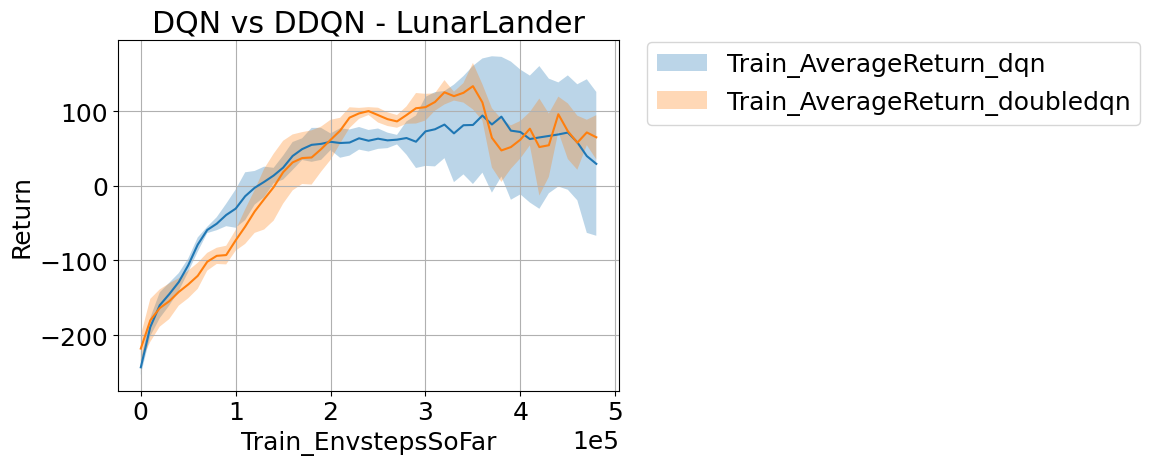

In [100]:
plt.figure(figsize=(12,5))
single_figure(f'../../submit/data/q2_dq*/events*', (1,2), 'DQN vs DDQN - LunarLander', 
              ynames=['Train_AverageReturn'], xname='Train_EnvstepsSoFar',
              plot_avg=True, save=None)
single_figure(f'../../submit/data/q2_do*/events*', (1,2), 'DQN vs DDQN - LunarLander', 
              ynames=['Train_AverageReturn'], xname='Train_EnvstepsSoFar',
              plot_avg=True, save='q2')

# Q3

dict_keys(['Train_EnvstepsSoFar', 'TimeSinceStart', 'Train_AverageReturn', 'Training_Loss', 'Train_BestReturn'])
dict_keys(['Train_EnvstepsSoFar', 'TimeSinceStart', 'Train_AverageReturn', 'Training_Loss', 'Train_BestReturn'])
dict_keys(['Train_EnvstepsSoFar', 'TimeSinceStart', 'Train_AverageReturn', 'Training_Loss', 'Train_BestReturn'])


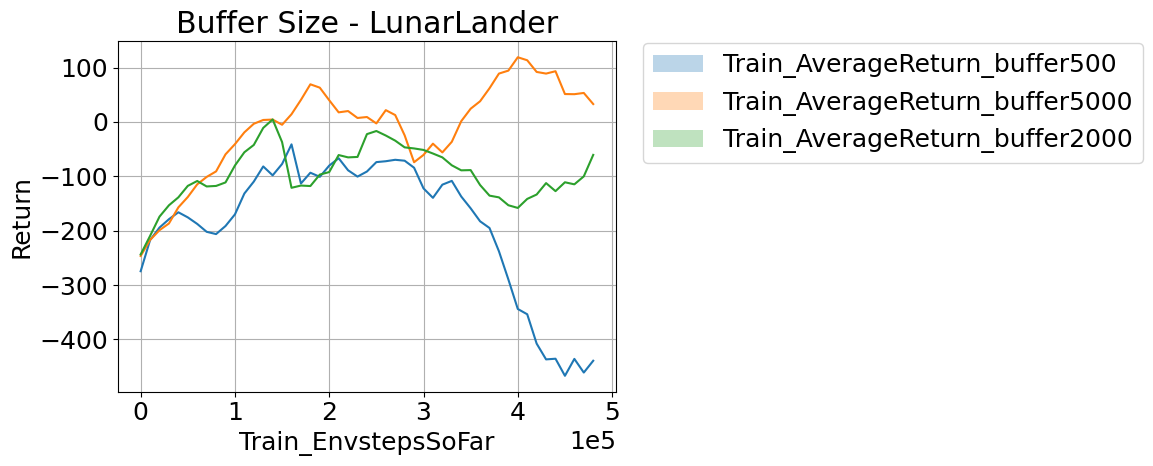

In [105]:
plt.figure(figsize=(12,5))
single_figure(f'../../submit/data/q3*/events*', (2,3), 'Buffer Size - LunarLander', 
              ynames=['Train_AverageReturn'], xname='Train_EnvstepsSoFar',
              save='q3')

# Q4

dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Initial_DataCollection_AverageReturn'])
dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Initial_DataCollection_AverageReturn'])
dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Initial_DataCollection_AverageReturn'])
dict_keys(['Eval_AverageReturn', 'Eva

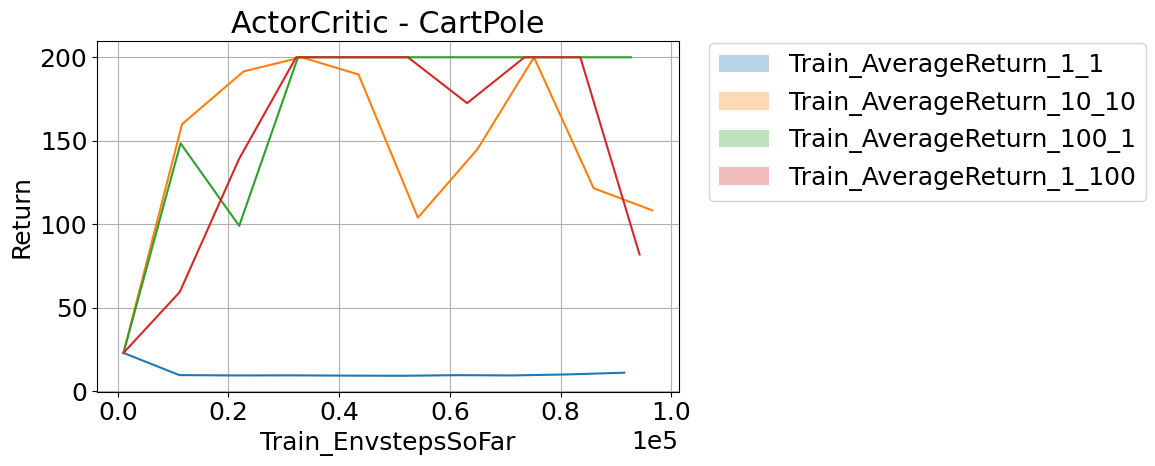

In [110]:
plt.figure(figsize=(12,5))
single_figure(f'../../submit/data/q4*/events*', (2,4), 'ActorCritic - CartPole', 
              ynames=['Train_AverageReturn'], xname='Train_EnvstepsSoFar',
              save='q4')

# Q5

dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Initial_DataCollection_AverageReturn'])


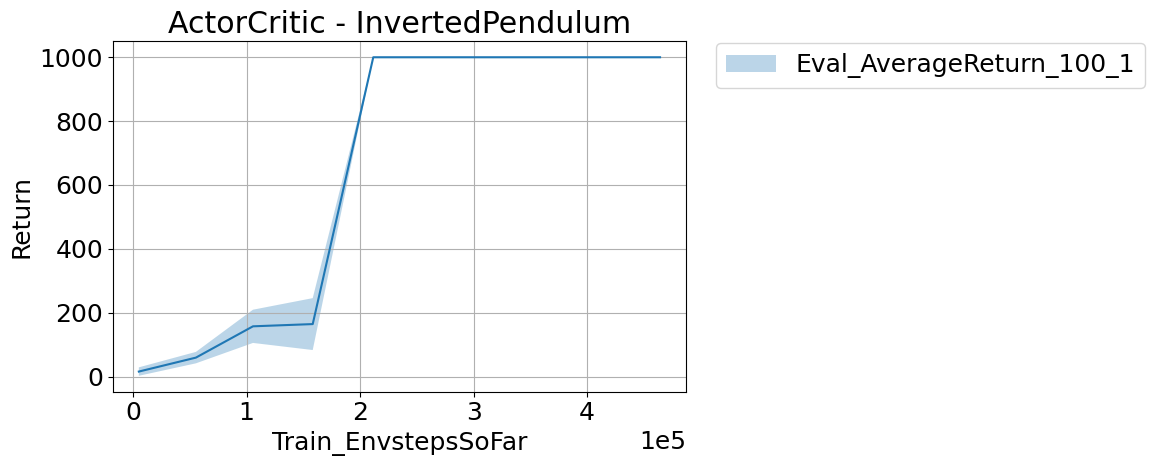

In [116]:
plt.figure(figsize=(12,5))
single_figure(f'../../submit/data/q5*Inv*/events*', (1,3), 'ActorCritic - InvertedPendulum', 
              ynames=['Eval_AverageReturn'], xname='Train_EnvstepsSoFar',
              save='q5a')

dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Initial_DataCollection_AverageReturn'])


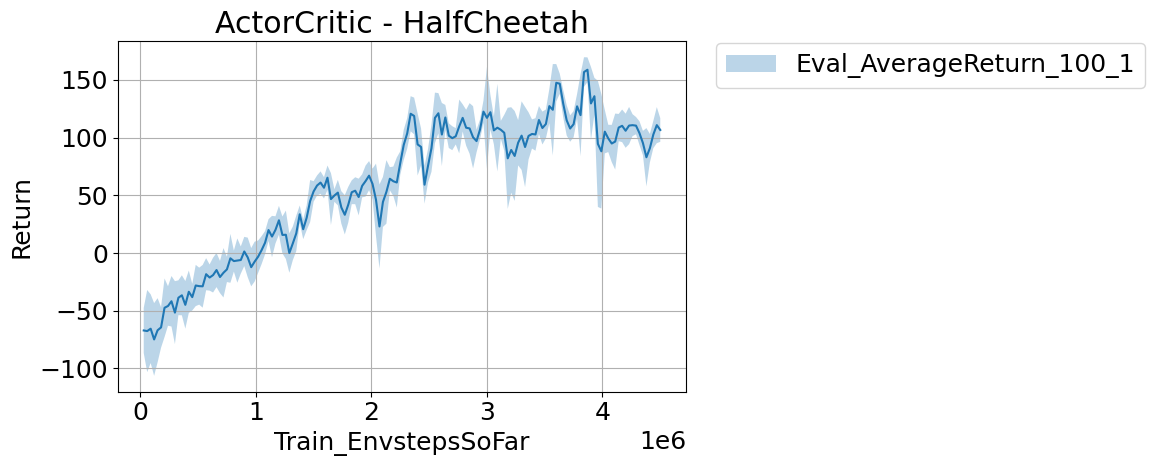

In [115]:
plt.figure(figsize=(12,5))
single_figure(f'../../submit/data/q5*Half*/events*', (1,3), 'ActorCritic - HalfCheetah', 
              ynames=['Eval_AverageReturn'], xname='Train_EnvstepsSoFar',
              save='q5b')

# Q6

dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Alpha_Loss', 'Temperature', 'Initial_DataCollection_AverageReturn'])


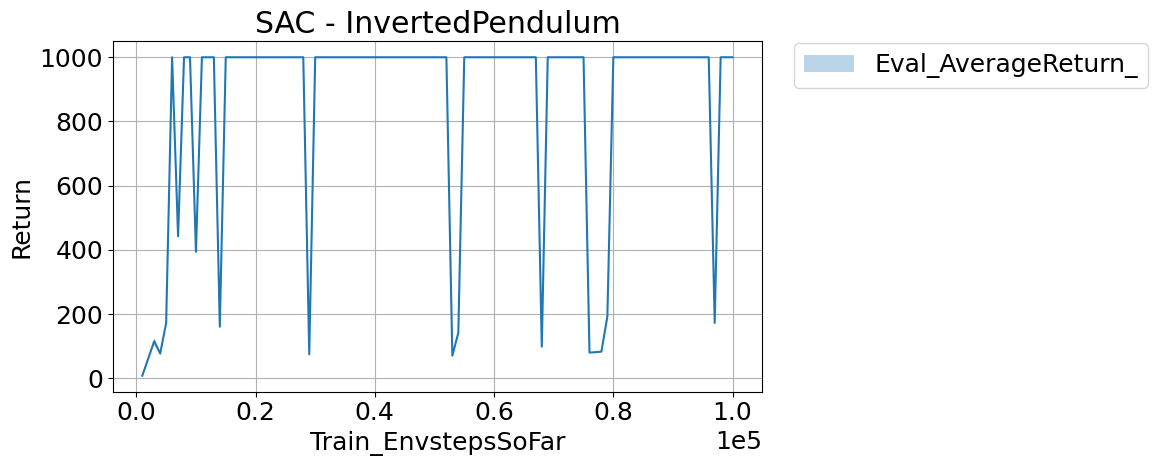

In [118]:
plt.figure(figsize=(12,5))
single_figure(f'../../submit/data/q6a*/events*', (1,1), 'SAC - InvertedPendulum', 
              ynames=['Eval_AverageReturn'], xname='Train_EnvstepsSoFar',
              save='q6a')

dict_keys(['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Critic_Loss', 'Actor_Loss', 'Alpha_Loss', 'Temperature', 'Initial_DataCollection_AverageReturn'])


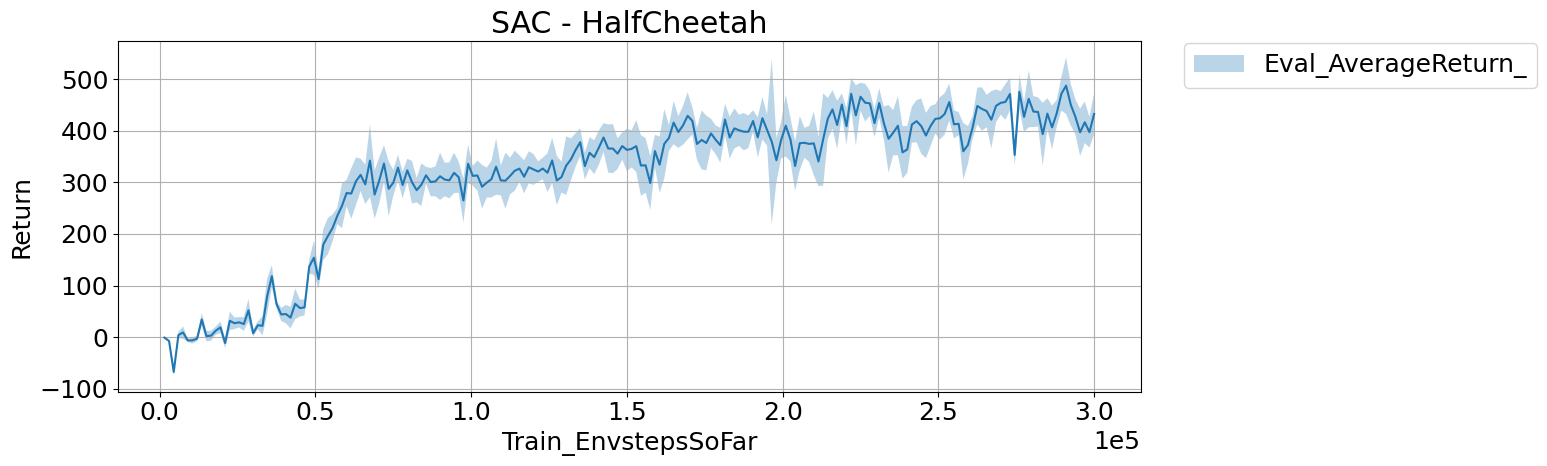

In [119]:
plt.figure(figsize=(12,5))
single_figure(f'../../submit/data/q6b*/events*', (1,1), 'SAC - HalfCheetah', 
              ynames=['Eval_AverageReturn'], xname='Train_EnvstepsSoFar',
              save='q6b')